# explain this:
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

https://www.reddit.com/r/explainlikeimfive/comments/4w0qlm/eli5_principal_component_analysis/

# What is PCA?
PCA is a __DIMENSIONALITY REDUCTION METHOD__ that lets you transform many dimensions in to fewer dimesions while still retaining most of the information from the original dimenions.

Trade accuracy for simplicity

Fewer dimensions means easier to: 
1. explore
2. process
3. vizualize

but, *harder* to interpret.

Another way to think about it, we're rotating the existing axes (dimensions) to new ones that are aligned with the greatest variance ('explainability') in the data.  


# understanding how to use PCA
PCA will standardize
then tranform data set (proejct into PCs)
you get back a transformed dataset that you can then use.

# Steps of PCA
We'll use some words you might not be familiar with - hang in there it's easier than it seems.
1. __standardize__
2. __compute covariance matrix__ - ID correlations
3. __compute eigenvectors and eigenvalues__ of the covariance matrix - ID principal components
4. __create a feature vector__ to decide which prinicpal components ot keep
5. __recast the data__ along the principle component axes

# Step One: Standardize

## Why?
1. standardize continuous variables' scales, so all contribute equally to the following steps.
2. variance of initial variable matters.
    1. a: 1 - 100000
    2. b: 0-0.1
    3. PCA without standardization will have a dominate over b
    


# Standardize

## How?

_z = (value - mean) / (standard deviation)_

each value is now zero centered, standard deviation = 1

Note, each variable will retain it's original relative distribution.



# Note how the axes have changed, 
# but the shape of the relative shape of the data hasn't.


In [6]:
# import helper_functions
# df = ameshousing data df
# helper_functions.demo_standardization('OverallQual', df)

# Step Two: Compute Covariance Matrix

1. how do our input data dimensions vary from the mean with respect to each other?
2. i.e. are they related?
3. highly correlated variables are redundant
4. The Covariance Matrix will tell us

# Compute Covariance Matrix

_p x p_ where _p_ is number of input dimensions

|  | x| y| z|
|--|--|--|--|
|x |Cov(x, x)| Cov(x, y) | Cov(x, z) |
|y |Cov(y, x)| Cov(y, y) | Cov(y, z) |
|x |Cov(y, x)| Cov(z, y) | Cov(z, z) |


_Cov(x,x) == Variance(x)_ the diagonal is each variable's variance

_Cov(x,y) == Cov(y,x)_ the matrix is symmetrical around the diagonal

positive covariance = correlated
negative covariance = inversely correlated

# Covariance formula for reference
Cov(x, y) = ∑(x<sub>i</sub>-x̄)(y<sub>j</sub>-ȳ) / n - 1


# Step Three: Compute Eigenvectors and Eigenvalues

1. linear algebra concepts needed to calculate principal components
2. principal components:
    1. new variables that are linear combinations or mixtures of initial variables
    2. these new variables/principal components are built so:
        1. they are not correlated
        2. most of the information in the original variables is in the first few new variables
        3. a 10 dim data set would give 10 possible prinicple components
        4. BUT PCA tries to put as much information as possible in the first component
        5. then as much of the remaining information as possble in the second component, and so on




plot of PC % explained variance here?

1. __There are as many PCs are variables in the data__

2. NB: these new combo variables/principle components are hard to interpret because of that linear combination.

3. think of PC as being a direction through the data that explains the maximum variance/captures the most information. 

4. more variance, more dispertion along that line, the more info there is

5. i.e. a PC is a new axis that has the best angle to see/eval the data so that differences between obs are more visible


# Finding The First Principle Component

The line through all the data with the __largest possible variance__ 


In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from typing import Tuple

def create_feature_data() -> np.ndarray:
    X1, Y1 = make_classification(
        n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
    )

    feature_1 = [x for x, y in zip(X1, Y1) if y == 0 ]  
    return np.stack(feature_1)


def scatter_plot_with_1_deg_poly_fit(feature_1: np.ndarray,
                                     axlims: Tuple[float, float]=None
                                    ) -> plt.Figure:
    plt.figure(figsize=(8, 8))
    plt.title("Random data w/ 1 degree polynomial fit")

    poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)

    plt.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k", label='random data')
    plt.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    plt.legend()
    plt.xlim(axlims)
    plt.ylim(axlims)
    return plt.Figure


def scatter_plot_with_projection(feature_1: np.ndarray,
                                 poly: np.polynomial.Polynomial = None,
                                 ax:plt.Axes = None,
                                 axlims: Tuple[float, float] = None
                                 ) -> plt.Axes:
    
    # fig, ax = plt.subplots(1,1, figsize=(8,8))
    if ax is None:
        ax=plt.gca()
    ax.set_title("Random data w/ projections to 1st degree polynomial fit")

    # create pc line and data projections on to that line
    if not poly:
        poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)
    proj_points = all_points_projection(feature_1, poly)
    
    # draw lines between data points and projection points
    lines = [[(f[0], f[1]), (p[0], p[1])] for f, p in zip(feature_1, proj_points)]
    lc = mpl.collections.LineCollection(lines, color='orange')


    # plot data, poly fit, and lines from data to projection on poly fit
    ax.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k")
    ax.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    ax.add_collection(lc)
    
    if axlims:
        ax.set_ylim(axlims)
        ax.set_xlim(axlims)
    
    # force plot to be square
    plt.ylim(plt.xlim())

    return ax


def ClosestPointOnLine(p, poly):
    a = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    b = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    print(f'{p=}, {a=}, {b=}')
    
    ap = p-a
    ab = b-a
    result = a + np.dot(ap,ab)/np.dot(ab,ab) * ab
    return result


def projection(p3: Tuple[float, float], poly: np.polynomial.Polynomial):
    """return projected point of p3 onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max()
    min_x = np.min()
    p1 = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    p2 = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    # confirm points from poly being used for projection
    plt.scatter([p1[0], p2[0]],
                [p1[1], p2[1]],
                marker='o', edgecolor='k',
                c='red')

    
    # caluclate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')
    

    # calculate t (angent?)
    t = np.sum((p3 - p1) * (p2 - p1)) / l2
                   
    if t > 1 or t < 0:
        print('p3 does not project onto p1-p2 line segment')
        
    # calculate point projected on to poly-fit           
    proj = p1 + t * (p2 - p1)   
        
    return proj


def all_points_projection(data: np.ndarray, 
                          poly: np.polynomial.Polynomial) -> np.ndarray:
    """return projected points of all points in 'data' onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max(data[:,0])
    min_x = np.min(data[:,0])
    p1 = np.array([min_x, poly(min_x)])
    p2 = np.array([max_x, poly(max_x)])
    
    # calculate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')

    proj_points = []
    for p3 in data:
        # TODO: vectorize
        # calculate t
        t = np.sum((p3 - p1) * (p2 - p1)) / l2

        if t > 1 or t < 0:
            print('p3 does not project onto p1-p2 line segment')

        # calculate point projected on to poly-fit           
        proj = p1 + t * (p2 - p1)   
        proj_points.append(proj)

    return np.vstack(proj_points)

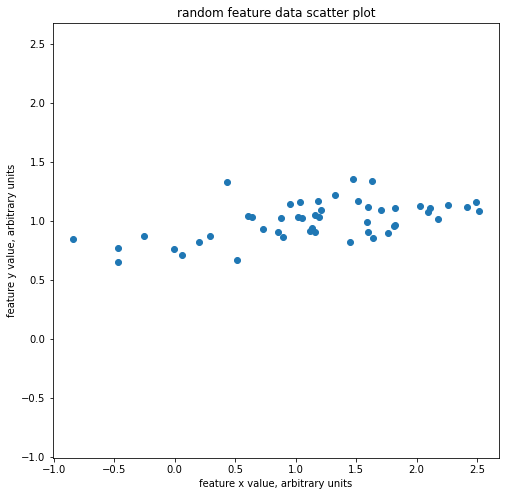

In [10]:
# Here is a random data feature, re-run until you like it:
def create_feature_scatter_plot() -> Tuple[np.ndarray, Tuple[float, float]]:
    feature_data = create_feature_data()
    fig, ax = plt.subplots(1,1, figsize=(8, 8))
    plt.scatter(feature_data[:,0], feature_data[:,1])
    # ensure square plot
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    min_ax_val = min(xlims[0], ylims[0])
    max_ax_val = max(xlims[1], ylims[1])
    ax.set_xlim(min_ax_val, max_ax_val)
    ax.set_ylim(min_ax_val, max_ax_val)
    # label and plot
    ax.set_title('random feature data scatter plot')
    ax.set_xlabel('feature x value, arbitrary units')
    ax.set_ylabel('feature y value, arbitrary units')
    plt.show()
    return feature_data, (min_ax_val, max_ax_val)

feature, axlims = create_feature_scatter_plot()

### What is the line of best fit through this data?

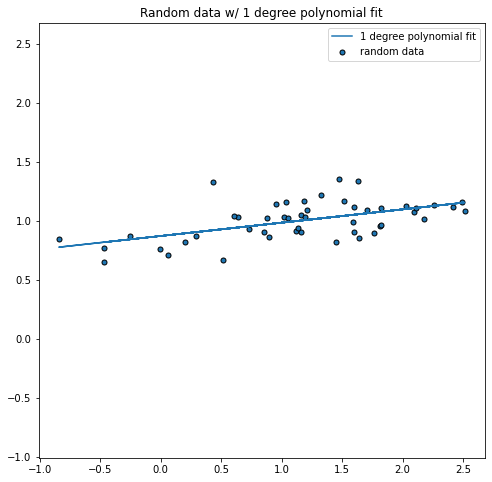

In [11]:
ax = scatter_plot_with_1_deg_poly_fit(feature, axlims)

## How do we know this line has the most variance?

1. if you project each data point on to that line of best fit
2. then the sum of the distances of those projected points to the center of the line is the variance.
3. more distance, more variance.
4. most distance, most variance.

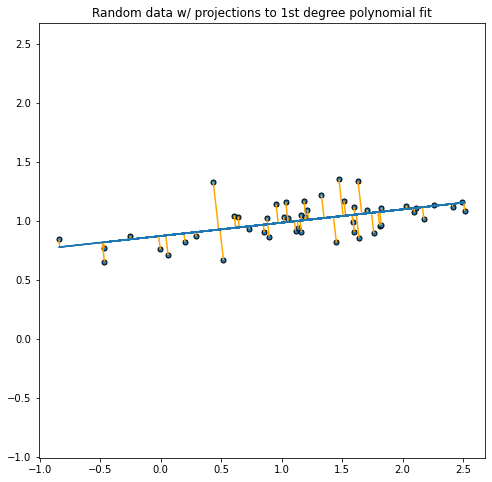

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax = scatter_plot_with_projection(feature, ax=ax, axlims=axlims)
plt.show()

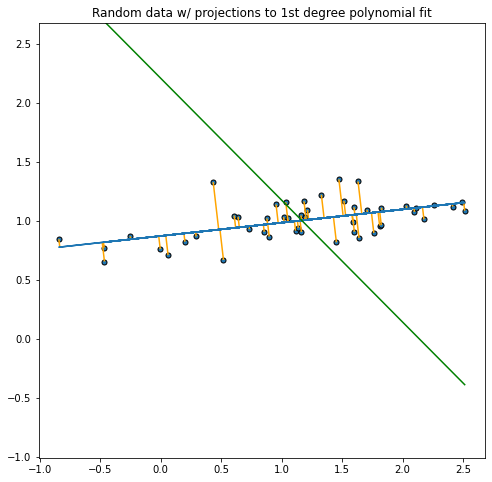

In [15]:
from typing import List
poly = np.polynomial.Polynomial.fit(feature[:, 0], feature[:, 1], deg=1)
m, b = poly.coef
# ortho_poly = np.polynomial.Polynomial.fit(feature[:, 0], 
#                                           feature[:, 0] * -m + b*2, 
#                                   deg=1)

def new_line(m, x, b) -> float:
    return m * x + b

def orthogonal_line(feature, slope) -> Tuple[List[float], List[float]]: 
    perpendicular_slope = -(1/slope)
    x_center_point = sum(feature[:, 0]) / len(feature[:, 0])
    y_center_point = sum(feature[:, 1]) / len(feature[:, 1])
    constant = y_center_point - (perpendicular_slope * x_center_point)

    max_x = max(feature[:, 0])
    max_y = perpendicular_slope * max_x + constant
    min_x = min(feature[:, 0])
    min_y = perpendicular_slope * min_x + constant
    return [min_x, max_x], [min_y, max_y]

ortho_x, ortho_y = orthogonal_line(feature, m)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
scatter_plot_with_projection(feature, ax=ax)
ax.plot(ortho_x, ortho_y, color='green')
#scatter_plot_with_projection(feature, poly=ortho_poly, ax=ax)
plt.show()


The line through all the data with the __largest possible variance__ 

i.e. the average of the squared distances from the projected points to the origin.

The second PC is found in the same way 
    - with the condition that it is perpendicular to the first PC
   
Keep going in that was till # PCs = # dimensions/variables


## eigenvectors and eigenvalues
alwyas come in pairs - every eigenvector has an eigen value
one for every dimension
10 dimensions, 10 eigenvectors with 10 eigen values.

the eigenvectors for the covariance matrix are the directions of the axes where there is the most variance, i.e. a Principle Component. An eigenvalue is a coefficient attached to an eigenvector - the amount of variance in each principle component

rank eigenvectors by eigenvalues and you get PCs in order of significance.

% of variance caluclated by eigenvalue/sum(eigenvalues)

## Feature vector
choose which PCs to keep (discard low eigenvalue PCs)
form a matrix of vectors with the PCs you keep: the feature vector.

a matrix w/ columns == eigenvectors of the kept PCs.

dimensionality reduction is happening here

fewer kepts PCs means feature dimensions.

lose that % of information (hopefully small), but get reduced complexity


## Recast the Data
Recast the data along the principle component axes
to this point no change in the data (unless you count the standardization)
now use the feature vector to reorient the data
    from original axes to the ones represented by the PCs
achieve this by multiplying the the transpose of the original dataset
with the transpose of the feature vector

final_dataset = feature_vector<sup>T</sup> * standardized_original_dataset<sup>T</sup>

In [18]:
from sklearn.decomposition import PCA
p = PCA(n_components=len(X.columns.tolist()))
p.fit(X)

NameError: name 'X' is not defined

In [19]:
def plot_eigenvectors(p: sklearn.decomposition._pca.PCA) -> Tuple[plt.Figure, plt.Axes]:
    print(f'{p.components_.shape=}')
    fig, ax = plt.subplots(1,1)
    im = ax.pcolormesh(abs(p.components_.T), norm=mpl.colors.LogNorm(vmin=1e-6))
    ax.set_title('heat map of absolute values of PCA eigenvectors')
    ax.set_ylabel('eigenvector value')
    ax.set_xlabel('eigenvector')
    plt.colorbar(im)
    return plt.Figure, plt.Axes

NameError: name 'sklearn' is not defined

In [20]:
plot_eigenvectors(p)
plt.show()

NameError: name 'plot_eigenvectors' is not defined

In [21]:
p = PCA(n_components=2)
p.fit(X)

NameError: name 'X' is not defined

In [22]:
plot_eigenvectors(p)
plt.show()
# make sure fit doesn't have target value in it!!
# ensure column names are what you want
# don't fit on non-numerics, non-nans
# plot out eigenvector plots w/ column names (for top x variables...)
# point out properties of the plot:
# What is each vector highlighting?
# many small values - many variables are correlated
# see if stronger vals correlate with top 30 / bottom 30 analysis.

NameError: name 'plot_eigenvectors' is not defined

In [23]:
cols_i_care_about = [x for x in numeric_cols if x not in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice', 'hue']]
for v in p.components_:
    v = abs(v)
    max_v = max(v)
    idx = v.tolist().index(max_v)
    print(max_v, idx, cols_i_care_about[idx])

NameError: name 'numeric_cols' is not defined

In [24]:
for i, x in enumerate(df.columns.tolist()):
    print(i, x)

NameError: name 'df' is not defined

In [25]:
# eigenvectors (what is being used to transform the data)
import matplotlib as mpl


plot_eigenvectors(p)
plt.show()


NameError: name 'plot_eigenvectors' is not defined

In [26]:
components = p.transform(X)
components.shape

NameError: name 'X' is not defined

In [27]:
# WHAT JUST HAPPENED?

# what did PCA just do?

# (it's not magic)

In [28]:
# plot explained_variance_ratio - how well do the two components explain variance?
component_df = pd.DataFrame(
    {
        'pc0':p.explained_variance_ratio_[0],
        'pc1':p.explained_variance_ratio_[1]
    },
    index=[0]
)

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=component_df, ax=ax)
ax.set_title("bar plot of principal components' explained variance ratios")
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()

NameError: name 'pd' is not defined

NameError: name 'sns' is not defined

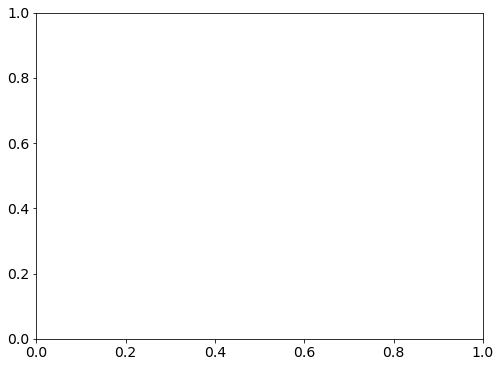

In [29]:
# what do those two components look like?
# plot the components PC0 and PC1 as a two category histogram

with mpl.rc_context({'font.size': 14}):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.histplot(pd.DataFrame(components,
                              columns=['pc0','pc1']),
                              bins=100,
                              ax=ax,
                              palette=sns.color_palette('Accent')[:2])
    ax.set_xlabel('component value')
    plt.xticks(rotation='45', ha='right')
    plt.show()


In [30]:
# Wrap up section
what discussed today:
    1.
    2.
    3.

SyntaxError: invalid syntax (565101033.py, line 2)